In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./../dist/aduan-siswa.csv')
df.head()

,Aduan,Label
0,sulit temu materi ajar perlu kelas pustaka mil...,Prasarana
1,benar sulit salah kelas bantu peduli sukses,Kesiswaan
2,benar sulit paham instruksi tugas,Kurikulum
3,sistem nilai adil konsisten guru pilih kasih s...,Kesiswaan
4,harap guru umpan tugas laku salah kembang krit...,Kurikulum


In [5]:
df['Label'].unique()

array(['Prasarana', 'Kesiswaan', 'Kurikulum'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Aduan   102 non-null    object
 1   Label   102 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [7]:
X_text = df['Aduan']
y = df['Label']

In [8]:
X_text.head()

0    sulit temu materi ajar perlu kelas pustaka mil...
1          benar sulit salah kelas bantu peduli sukses
2                    benar sulit paham instruksi tugas
3    sistem nilai adil konsisten guru pilih kasih s...
4    harap guru umpan tugas laku salah kembang krit...
Name: Aduan, dtype: object

In [9]:
y.head()

0    Prasarana
1    Kesiswaan
2    Kurikulum
3    Kesiswaan
4    Kurikulum
Name: Label, dtype: object

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

In [11]:
print(X.shape)
print(y.shape)

(102, 294)
(102,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(81, 294)
(21, 294)


In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5238095238095238

In [15]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[3, 0, 5],
       [2, 2, 2],
       [1, 0, 6]])

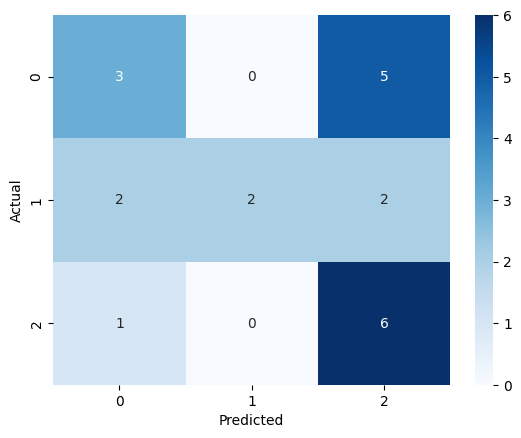

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [17]:
input_saran = vectorizer.transform(['peralatan di ruang C banyak yang rusak, tolong untuk diganti'])
predict = model.predict(input_saran)

print(predict[0])

Prasarana
